# Basic Statistics Case Study

## Business Problem-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
Loans_Data=pd.read_csv(r'LoansData.csv').convert_dtypes()
Loans_Data

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
1,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
2,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.0,690-694,14,21977,1,2 years
3,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
4,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.0,695-699,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000,29950.0,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.0,705-709,15,45880,1,8 years
2496,16000,16000.0,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18,18898,1,10+ years
2497,10000,10000.0,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4,4544,0,10+ years
2498,6000,6000.0,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.0,675-679,8,7753,0,5 years


In [3]:
Loans_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   Int64  
 1   Amount.Funded.By.Investors      2499 non-null   Float64
 2   Interest.Rate                   2498 non-null   string 
 3   Loan.Length                     2500 non-null   string 
 4   Loan.Purpose                    2500 non-null   string 
 5   Debt.To.Income.Ratio            2499 non-null   string 
 6   State                           2500 non-null   string 
 7   Home.Ownership                  2499 non-null   string 
 8   Monthly.Income                  2499 non-null   Float64
 9   FICO.Range                      2498 non-null   string 
 10  Open.CREDIT.Lines               2497 non-null   Int64  
 11  Revolving.CREDIT.Balance        2497 non-null   Int64  
 12  Inquiries.in.the.Last.6.Months  24

In [4]:
# Columns Renaming
Loans_Data.columns=Loans_Data.columns.str.replace('.','_')

In [5]:
Loans_Data.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
1,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
2,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.0,690-694,14,21977,1,2 years


In [6]:
# Changing to suitable Datatypes
Loans_Data.Interest_Rate=Loans_Data.Interest_Rate.str.strip('%').astype('float')

In [7]:
Loans_Data.Debt_To_Income_Ratio=Loans_Data.Debt_To_Income_Ratio.str.strip('%').astype('float')

In [8]:
Loans_Data.Loan_Length=Loans_Data.Loan_Length.str.strip('months').astype('int')

In [9]:
Loans_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   Int64  
 1   Amount_Funded_By_Investors      2499 non-null   Float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   int32  
 4   Loan_Purpose                    2500 non-null   string 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2500 non-null   string 
 7   Home_Ownership                  2499 non-null   string 
 8   Monthly_Income                  2499 non-null   Float64
 9   FICO_Range                      2498 non-null   string 
 10  Open_CREDIT_Lines               2497 non-null   Int64  
 11  Revolving_CREDIT_Balance        2497 non-null   Int64  
 12  Inquiries_in_the_Last_6_Months  24

In [10]:
Loans_Data.isna().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

### Dropping Unneccessary Column and na values

In [11]:
Loans_Data.drop(columns=['Employment_Length'],inplace=True)

In [12]:

Loans_Data=Loans_Data.dropna()

### Filling missing values

In [13]:
Loans_Data.Amount_Requested=Loans_Data.Amount_Requested.astype('float')

In [14]:
Loans_Data.Open_CREDIT_Lines=Loans_Data.Open_CREDIT_Lines.astype('float')

In [15]:
Loans_Data.Revolving_CREDIT_Balance=Loans_Data.Revolving_CREDIT_Balance.astype('float')

In [16]:
Loans_Data.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
dtype: int64

In [17]:
Loans_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2489 non-null   float64
 1   Amount_Funded_By_Investors      2489 non-null   Float64
 2   Interest_Rate                   2489 non-null   float64
 3   Loan_Length                     2489 non-null   int32  
 4   Loan_Purpose                    2489 non-null   string 
 5   Debt_To_Income_Ratio            2489 non-null   float64
 6   State                           2489 non-null   string 
 7   Home_Ownership                  2489 non-null   string 
 8   Monthly_Income                  2489 non-null   Float64
 9   FICO_Range                      2489 non-null   string 
 10  Open_CREDIT_Lines               2489 non-null   float64
 11  Revolving_CREDIT_Balance        2489 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

### BUSINESS PROBLEM:
### Using lending club loans data, the team would like to test below hypothesis on how different 
### factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)
### b. Loan length is directly effecting intrest rate.
### c. Inrest rate varies for different purpose of loans
### d. There is relationship between FICO scores and Home Ownership. It means that, People 
### with owning home will have high FICO scores.

## a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)


#### Hypothesis Defined:

#### Performing the Test:

In [18]:
Corr=stats.pearsonr(Loans_Data['Interest_Rate'],Loans_Data['Amount_Requested'])
Corr

(0.33080192768204364, 1.2455678861892716e-64)

### Conclusion

### As p-value = 1.2455678861892716e-64, p-value < 0.05, we can reject Null Hypothesis with 95% CL and Accept Alternate Hypothesis.
### There is a relationship between Interest Rate and Loan Amount. 

### b. Loan length is directly effecting interest rate

#### Defining Hypothesis:

In [19]:
Loans_Data.Loan_Length.value_counts()

36    1941
60     548
Name: Loan_Length, dtype: int64

In [20]:
Loan_Length36=Loans_Data['Interest_Rate'].loc[Loans_Data['Loan_Length']==36]
Loan_Length60=Loans_Data['Interest_Rate'].loc[Loans_Data['Loan_Length']==60]


In [21]:
Loan_Length36.mean()

12.128907779495213

In [22]:
Loan_Length60.mean()

16.40746350364961

#### Performing the Test:

In [23]:
stats.ttest_ind(Loan_Length36,Loan_Length60)

Ttest_indResult(statistic=-23.37963620691779, pvalue=1.9132344351585912e-109)

### Conclusion:

### As p-value=1.9132344351585912e-109, p-value < 0.05, So, we can reject Null hypothesis and accept alternate hypothesis.
### Hence, Loan length is directly effecting interest rate

### c. Interest rate varies for different purpose of loans

#### Defining Hypothesis:

In [24]:
Loans_Data.Loan_Purpose.value_counts()

debt_consolidation    1301
credit_card            443
other                  199
home_improvement       152
major_purchase         101
small_business          86
car                     50
wedding                 38
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: Int64

In [25]:
LP=Loans_Data.groupby('Loan_Purpose')[['Interest_Rate']].mean().reset_index()
LP

,Loan_Purpose,Interest_Rate
0,car,11.113000
1,credit_card,13.050655
2,debt_consolidation,13.589147
3,educational,11.007333
4,home_improvement,11.594276
5,house,13.448000
6,major_purchase,10.797822
7,medical,11.649667
8,moving,13.621034
9,other,13.202814


In [26]:
l1=Loans_Data.query('Loan_Purpose=="debt_consolidation"').Interest_Rate
l2=Loans_Data.query('Loan_Purpose=="credit_card"').Interest_Rate
l3=Loans_Data.query('Loan_Purpose=="other"').Interest_Rate
l4=Loans_Data.query('Loan_Purpose=="home_improvement"').Interest_Rate
l5=Loans_Data.query('Loan_Purpose=="major_purchase"').Interest_Rate
l6=Loans_Data.query('Loan_Purpose=="small_business"').Interest_Rate            
l7=Loans_Data.query('Loan_Purpose=="car"').Interest_Rate
l8=Loans_Data.query('Loan_Purpose=="wedding"').Interest_Rate
l9=Loans_Data.query('Loan_Purpose=="medical"').Interest_Rate
l10=Loans_Data.query('Loan_Purpose=="moving"').Interest_Rate
l11=Loans_Data.query('Loan_Purpose=="vacation"').Interest_Rate
l12=Loans_Data.query('Loan_Purpose=="house"').Interest_Rate
l13=Loans_Data.query('Loan_Purpose=="educational"').Interest_Rate
l14=Loans_Data.query('Loan_Purpose=="renewable_energy"').Interest_Rate  

#### Performing the test:

In [27]:
stats.f_oneway(l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14)

F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

### Conclusion:

### As p-value=1.1346364693350775e-14, p-value < 0.05, So, we can reject Null hypothesis and accept alternate hypothesis.
### Hence, Interest Rate vary with the purpose of Loans.

### d. There is relationship between FICO scores and Home Ownership. It means that, People 
### with owning home will have high FICO scores.

#### Defining Hypothesis:

In [28]:
Home_Fico=pd.crosstab(Loans_Data.Home_Ownership,Loans_Data.FICO_Range)
Home_Fico

FICO_Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home_Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,67,79,55,61,...,21,12,15,7,7,6,5,6,0,1
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,66,75,89,75,91,64,...,4,5,4,5,2,3,2,0,0,0


#### Performing the Test:

In [29]:
Chi=stats.chi2_contingency(Home_Fico)
Chi

(281.6125223416783,
 8.424183189199129e-17,
 111,
 array([[2.29811169e+00, 1.37886701e+00, 4.59622338e-01, 1.83848935e+00,
         5.69931699e+01, 6.66452391e+01, 7.81357975e+01, 7.62973082e+01,
         7.21607071e+01, 6.20490157e+01, 6.38875050e+01, 7.03222178e+01,
         6.02105263e+01, 6.15893933e+01, 5.05584572e+01, 4.27448775e+01,
         5.14777019e+01, 4.32044998e+01, 4.32044998e+01, 2.98754520e+01,
         2.43599839e+01, 2.48196063e+01, 2.80369626e+01, 2.11426276e+01,
         2.11426276e+01, 1.65464042e+01, 7.81357975e+00, 1.01116914e+01,
         1.28694255e+01, 8.73282443e+00, 9.19244677e+00, 5.97509040e+00,
         5.51546806e+00, 5.05584572e+00, 3.67697871e+00, 2.75773403e+00,
         4.59622338e-01, 4.59622338e-01],
        [1.00441945e-02, 6.02651667e-03, 2.00883889e-03, 8.03535556e-03,
         2.49096022e-01, 2.91281639e-01, 3.41502611e-01, 3.33467256e-01,
         3.15387706e-01, 2.71193250e-01, 2.79228606e-01, 3.07352350e-01,
         2.63157895e-01, 2.69184

### Conclusion:

### As p-value=8.424183189199129e-17, p-value < 0.05, we can reject Null Hypothesis.
### So, there is a relationship betweeen FICO score and Home Ownership.

## Business Problem-2

In [30]:
Price_Quotes=pd.read_csv(r'Price_Quotes.csv').convert_dtypes()
Price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [31]:
Price_Quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     Int64
 1   Barry_Price   12 non-null     Int64
 2   Mary_Price    12 non-null     Int64
dtypes: Int64(3)
memory usage: 452.0 bytes


In [32]:
Price_Quotes.isna().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

### BUSINESS PROBLEM: We would like to assess if there is any difference in the average 
### price quotes provided by Mary and Barry

#### Defining Hypothesis:

In [33]:
Price_Quotes.Barry_Price.mean()

124.33333333333333

In [34]:
Price_Quotes.Mary_Price.mean()

114.75

#### Performing the Test:

In [35]:
stats.ttest_rel(Price_Quotes.Barry_Price,Price_Quotes.Mary_Price)

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

### Conclusion:

### As, p-value=0.02840588045242053, p-value <  0.05. So, we can reject Null Hypothesis.
### Hence, There is a significant difference between average price quoted by Mary and Barry.

## BUSINESS PROBLEM-3:

In [36]:
Treatment_Facility=pd.read_csv(r'Treatment_Facility.csv').convert_dtypes()
Treatment_Facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.19883
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.0
7,8,Prior,11.4286,31.25,25.0
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0,16.574586,16.574586


In [37]:
Treatment_Facility.rename(columns={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [38]:
Treatment_Facility

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.19883
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.0
7,8,Prior,11.4286,31.25,25.0
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0,16.574586,16.574586


In [39]:
Treatment_Facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     Int64  
 1   Reengineer         20 non-null     string 
 2   Employee_Turnover  20 non-null     Float64
 3   TRFF               20 non-null     Float64
 4   CI                 20 non-null     Float64
dtypes: Float64(3), Int64(1), string(1)
memory usage: 1008.0 bytes


In [40]:
Treatment_Facility.isna().sum()

Month                0
Reengineer           0
Employee_Turnover    0
TRFF                 0
CI                   0
dtype: int64

### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the 
### incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
### changed the critical incidence rate. Is there evidence that the critical incidence rate improved ?

#### Defining the Hypothesis:

#### Performing the test:

In [41]:
Prior_IB=Treatment_Facility.loc[Treatment_Facility.Reengineer=='Prior'].CI

In [42]:
Post_IB=Treatment_Facility.loc[Treatment_Facility.Reengineer=='Post'].CI

In [43]:
stats.ttest_ind(Prior_IB,Post_IB)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

### Conclusion:

### As p-value=0.12091989189884149, p-cvalue > 0.05, we cannot reject Null Hypothesis.
### The reengineering effort had no effect on incidence behaviour of prior and post.

In [44]:
Prior_ET=Treatment_Facility.loc[Treatment_Facility.Reengineer=='Prior'].Employee_Turnover

In [45]:
Post_ET=Treatment_Facility.loc[Treatment_Facility.Reengineer=='Post'].Employee_Turnover

In [46]:
stats.ttest_ind(Prior_ET,Post_ET)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

### Conclusion:

### As p-value=0.09361109345535304, p-cvalue > 0.05, we cannot reject Null Hypothesis.
### The reengineering effort had no effect on Staff turnover of prior and post.

## BUSINESS PROBLEM-4

In [47]:
Priority_Assessment=pd.read_csv(r'Priority_Assessment.csv')
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [48]:
Priority_Assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [49]:
Priority_Assessment.isna().sum()

Days        0
Priority    0
dtype: int64

### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then
### high priority jobs, on average, should be completed more quickly than medium priority jobs,
### and medium priority jobs should be completed more quickly than low priority jobs. Use the
### data provided to determine whether thisis, in fact, occurring.

In [50]:
High=Priority_Assessment.loc[Priority_Assessment.Priority=='High'].Days

In [51]:
Medium=Priority_Assessment.loc[Priority_Assessment.Priority=='Medium'].Days

In [52]:
Low=Priority_Assessment.loc[Priority_Assessment.Priority=='Low'].Days

#### Perform the Test:

In [53]:
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [54]:
High.mean()

3.023619631901845

In [55]:
Medium.mean()

2.5000000000000004

In [56]:
Low.mean()

4.228358208955225

### Conclusion:

### As p-value=0.16411459461716182, p-value > 0.05, So, we cannot reject Null Hypothesis.
### The Prioritization system is not working.

## BUSINESS PROBLEM-5


In [57]:
Films=pd.read_csv(r'Films.csv')
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [58]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [59]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [60]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [61]:
Films.Gender=np.where((Films.Gender=='Male')|(Films.Gender=='1'),'Male','Female')

In [62]:
Films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [63]:
Films.Marital_Status=np.where((Films.Marital_Status=='Married')|(Films.Marital_Status=='1'),'Married','Single')

### Filling Na values

In [64]:


Films['Marital_Status'] =Films['Marital_Status'].fillna(Films['Marital_Status'].mode()[0])
Films['Sinage'] = Films['Sinage'].fillna(Films['Sinage'].mode()[0])
Films['Parking'] = Films['Parking'].fillna(Films['Parking'].mode()[0])
Films['Clean'] = Films['Clean'].fillna(Films['Clean'].mode()[0])
Films['Overall'] = Films['Overall'].fillna(Films['Overall'].mode()[0])
Films['Age'] = Films['Age'].fillna(Films['Age'].mode()[0])
Films['Income'] = Films['Income'].fillna(Films['Income'].mode()[0])
Films['Hear_About'] = Films['Hear_About'].fillna(Films['Hear_About'].mode()[0])



In [65]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [66]:
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


### BUSINESS PROBLEM: Use the survey resultsto address the following questions
###  What is the overall level of customer satisfaction?
###  What factors are linked to satisfaction?
###  What is the demographic profile of Film on the Rocks patrons?
###  In what media outlet(s) should the film series be advertised?

### (a) What is the overall level of customer satisfaction?

#### Defining the Hypothesis:

In [ ]:
H0(Null-Hypothesis): The Overall customer is satisfied.
    
Ha(Alternate Hypothesis): The overall Customer is not satisfied.
Confidence Level : 95 %


In [72]:
Mean_O=Films.Overall.mean()
Mean_O

1.621212121212121

In [73]:
Std_O=Films.Overall.std()
Std_O

0.6878262202585181

In [78]:
Films.shape[0]

330

In [75]:
SE=Std_O/np.sqrt(330)
SE

0.037863587260422576

In [79]:
CI=(Mean_O-(1.96*SE),Mean_O+(1.96*SE))
CI

(1.5469994901816928, 1.6954247522425494)

### Conclusion:

### As the Mean_O is in the range of CI, so we cannot reject Null Hypothesis with 95% CL.
### Hence, With 95% Confidence Level, we cannot say that the customers were overall satisfied.

### (b) What factors are linked to satisfaction?

#### Defining the Hypothesis:

In [93]:
T1=pd.crosstab(Films.Sinage,Films.Overall)

In [95]:
T2=pd.crosstab(Films.Clean,Films.Overall)

In [94]:
T3=pd.crosstab(Films.Parking,Films.Overall)

#### Performing the Test:

In [100]:
Chi1=stats.chi2_contingency(T1)
Chi1

(125.61859671027881,
 4.53298970003405e-19,
 16,
 array([[5.17060606e+01, 5.54727273e+01, 4.10909091e+00, 3.42424242e-01,
         1.36969697e+00],
        [7.22969697e+01, 7.75636364e+01, 5.74545455e+00, 4.78787879e-01,
         1.91515152e+00],
        [2.19636364e+01, 2.35636364e+01, 1.74545455e+00, 1.45454545e-01,
         5.81818182e-01],
        [2.74545455e+00, 2.94545455e+00, 2.18181818e-01, 1.81818182e-02,
         7.27272727e-02],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02]]))

In [103]:
p_value1=Chi1[1]
p_value1

4.53298970003405e-19

In [104]:
Chi2=stats.chi2_contingency(T2)
Chi2

(127.71945555999517,
 1.7772535915434025e-19,
 16,
 array([[6.58909091e+01, 7.06909091e+01, 5.23636364e+00, 4.36363636e-01,
         1.74545455e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.09818182e+01, 1.17818182e+01, 8.72727273e-01, 7.27272727e-02,
         2.90909091e-01],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02],
        [9.15151515e-01, 9.81818182e-01, 7.27272727e-02, 6.06060606e-03,
         2.42424242e-02]]))

In [106]:
p_value2=Chi2[1]
p_value2

1.7772535915434025e-19

In [109]:
Chi3=stats.chi2_contingency(T3)
Chi3

(230.61691663391676,
 4.783162283608494e-40,
 16,
 array([[6.17727273e+01, 6.62727273e+01, 4.90909091e+00, 4.09090909e-01,
         1.63636364e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.32696970e+01, 1.42363636e+01, 1.05454545e+00, 8.78787879e-02,
         3.51515152e-01],
        [3.20303030e+00, 3.43636364e+00, 2.54545455e-01, 2.12121212e-02,
         8.48484848e-02],
        [1.83030303e+00, 1.96363636e+00, 1.45454545e-01, 1.21212121e-02,
         4.84848485e-02]]))

In [112]:
p_value3=Chi3[1]
p_value3

4.783162283608494e-40

### Conclusion:

### As, p-value=4.53298970003405e-19,1.7772535915434025e-19,4.783162283608494e-40, p-value < 0.05, hence we can reject Null Hypothesis.
### Hence, the factors Parking, Sinage and Cleaning are linked to overall  Customer satisfaction.

### (c) What is the demographic profile of Film on the Rocks patrons?

In [116]:
Gen=Films.Gender.value_counts()
Gen

Female    213
Male      117
Name: Gender, dtype: int64

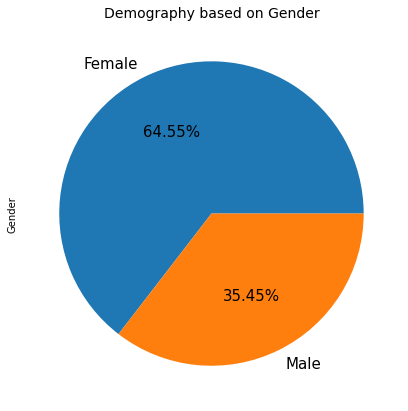

In [127]:
Gen.plot(kind='pie',autopct='%1.2f%%',figsize=(15,7),fontsize=15)
plt.title('Demography based on Gender',fontsize=14)
plt.show()

In [130]:
M_S=Films.Marital_Status.value_counts()
M_S

Single     230
Married    100
Name: Marital_Status, dtype: int64

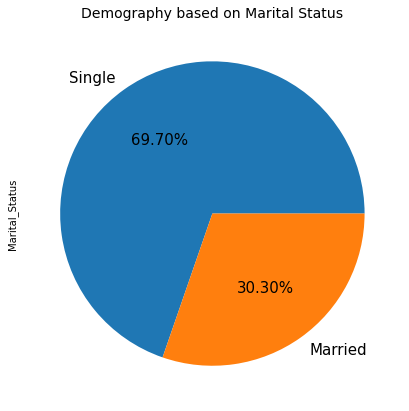

In [131]:
M_S.plot(kind='pie',autopct='%1.2f%%',figsize=(15,7),fontsize=15)
plt.title('Demography based on Marital Status',fontsize=14)
plt.show()

In [134]:
Age_Group=Films.Age.value_counts()
Age_Group

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

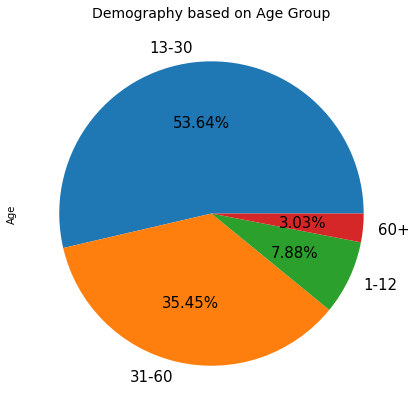

In [138]:
Age_Group.plot(kind='pie',labels=['13-30','31-60','1-12','60+'],autopct='%1.2f%%',figsize=(15,7),fontsize=15)
plt.title('Demography based on Age Group',fontsize=14)
plt.show()

### (d) In what media outlet(s) should the film series be advertised?

In [145]:
Reachability_Media=Films.Hear_About.value_counts()
Reachability_Media

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

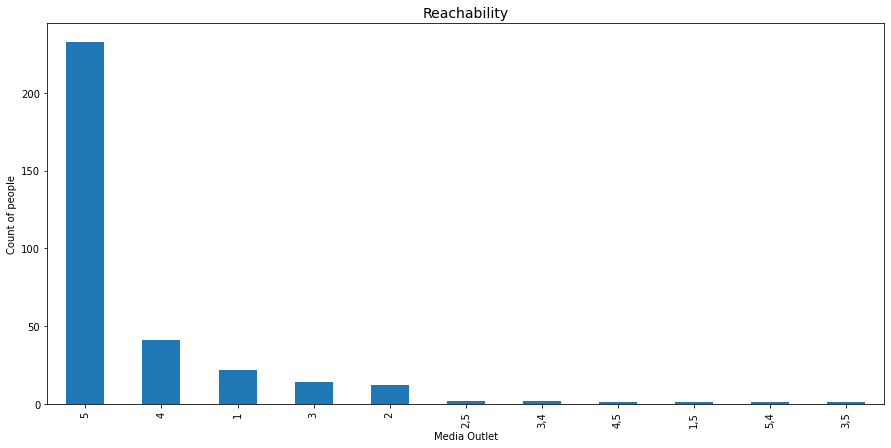

In [161]:
Reachability_Media.plot(kind='bar',xlabel='Media Outlet',ylabel='Count of people',figsize=(15,7),fontsize=10)
plt.title('Reachability',fontsize=14)
plt.show()

### Conclusion:

### The majority of people heard about the film series is through 5 i.e. 'Word of Mouth'.

## FINISH